In [49]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/privacy/")
from privacy.encode import encodeData, encodeNonAnonData
os.chdir("/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/")

In [50]:
import warnings

warnings.filterwarnings("ignore")

In [51]:
data = "texas"
k_list = [2, 3, 4, 5]

In [52]:
class NHS_Utility:
    def __init__(self, data, k_list):
        self.data = data
        self.k_list = k_list
    
    def get_features(self):
        self.features = []
        self.val = []
        for k in self.k_list:
            pr_org, X_org, y_org, pr_anon, X_anon, y_anon = encodeData(self.data, k, method='nhs')
            if not len(self.features):
                self.features.append((X_org, y_org))
            self.features.append((X_anon, y_anon))
        _, X_val, y_val = encodeNonAnonData(self.data, f'/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{self.data}/val.csv')
        self.val_data = X_val, y_val

    def get_model(self):
        self.models = []
        for _ in range(len(self.features)):
            if self.data == "texas":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                    tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                    tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                    tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                    tf.keras.layers.Dense(1)])
            elif self.data == "adult":
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(256, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(128, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(64, activation='relu'),
                    tf.keras.layers.Dense(32, activation='relu'),
                    tf.keras.layers.Dense(1, activation='sigmoid')])
            else:
                model = tf.keras.models.Sequential([tf.keras.layers.InputLayer(input_shape=(self.features[0][0].shape[1],)),
                    tf.keras.layers.Dense(10, activation='relu'),
                    tf.keras.layers.Dropout(0.5),
                    tf.keras.layers.Dense(4, activation='softmax')])
            self.models.append(model)

    def compile_models(self):
        for i in range(len(self.models)):
            if self.data == "adult":
                self.models[i].compile(optimizer='nadam',
                    loss='binary_crossentropy',
                    metrics=["accuracy"])
            elif self.data == "texas":
                self.models[i].compile(optimizer='nadam',
                    loss='mean_squared_error')
            else:
                self.models[i].compile(optimizer=tf.keras.optimizers.Adam(learning_rate=3e-4),
                    loss='categorical_crossentropy',
                    metrics=["accuracy"])

    def prepare_training(self):
        self.get_features()
        self.get_model()
        self.compile_models()
    
    def train(self):
        self.histories = []
        for i in range(len(self.k_list) + 1):
            X, y = self.features[i]
            callback_es = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)
            lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=3)
            history = self.models[i].fit(X, y, batch_size=32, epochs=100, validation_data=self.val_data, callbacks=[callback_es, lr_scheduler])
            self.histories.append(history)
            if i == 0:
                self.models[i].save(f"./nhs_weights/model_{self.data}_org.h5")
            else:
                self.models[i].save(f"./nhs_weights/model_{self.data}_{k_list[i-1]}.h5")
            print(f"{i+1} trained.")
            

In [53]:
nhs_util = NHS_Utility(data, k_list)

In [54]:
nhs_util.prepare_training()

Replacing all generalized values...


25532it [00:01, 24538.41it/s]


Replacing all generalized values...


16610it [00:00, 24405.01it/s]


Replacing all generalized values...


12590it [00:00, 23957.02it/s]


Replacing all generalized values...


10170it [00:00, 24931.66it/s]


Replacing all generalized values...


8396it [00:00, 24983.12it/s]


In [55]:
nhs_util.train()

Epoch 1/100


2023-12-15 20:19:59.985878: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - ETA: 0s - loss: 0.6509

2023-12-15 20:20:58.653285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


2362/2362 [==============================] - 61s 25ms/step - loss: 0.6509 - val_loss: 1.0535 - lr: 0.0010
Epoch 2/100
2362/2362 [==============================] - 61s 26ms/step - loss: 0.5502 - val_loss: 0.9468 - lr: 0.0010
Epoch 3/100
2362/2362 [==============================] - 60s 25ms/step - loss: 0.5095 - val_loss: 0.8938 - lr: 0.0010
Epoch 4/100
2362/2362 [==============================] - 59s 25ms/step - loss: 0.5073 - val_loss: 0.9378 - lr: 0.0010
Epoch 5/100
2362/2362 [==============================] - 60s 26ms/step - loss: 0.4659 - val_loss: 0.8407 - lr: 0.0010
Epoch 6/100
2362/2362 [==============================] - 60s 25ms/step - loss: 0.4690 - val_loss: 0.8255 - lr: 0.0010
Epoch 7/100
2362/2362 [==============================] - 60s 25ms/step - loss: 0.4871 - val_loss: 0.7655 - lr: 0.0010
Epoch 8/100
2362/2362 [==============================] - 60s 25ms/step - loss: 0.4462 - val_loss: 0.7663 - lr: 0.0010
Epoch 9/100
2362/2362 [==============================] - 62s 26ms/st

2023-12-15 20:45:22.885882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


798/798 [==============================] - ETA: 0s - loss: 0.6870

2023-12-15 20:45:43.983951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


798/798 [==============================] - 23s 28ms/step - loss: 0.6870 - val_loss: 1.7899 - lr: 0.0010
Epoch 2/100
798/798 [==============================] - 22s 28ms/step - loss: 0.6293 - val_loss: 1.7650 - lr: 0.0010
Epoch 3/100
798/798 [==============================] - 22s 28ms/step - loss: 0.6145 - val_loss: 1.9721 - lr: 0.0010
Epoch 4/100
798/798 [==============================] - 22s 27ms/step - loss: 0.6053 - val_loss: 3.4427 - lr: 0.0010
Epoch 5/100
798/798 [==============================] - 22s 27ms/step - loss: 0.6003 - val_loss: 2.0907 - lr: 0.0010
Epoch 6/100
798/798 [==============================] - 22s 27ms/step - loss: 0.5718 - val_loss: 2.0566 - lr: 5.0000e-04
Epoch 7/100
798/798 [==============================] - 22s 27ms/step - loss: 0.5668 - val_loss: 2.0586 - lr: 5.0000e-04
2 trained.
Epoch 1/100


2023-12-15 20:47:57.346239: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


520/520 [==============================] - ETA: 0s - loss: 0.6719

2023-12-15 20:48:12.206528: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


520/520 [==============================] - 17s 31ms/step - loss: 0.6719 - val_loss: 2.3557 - lr: 0.0010
Epoch 2/100
520/520 [==============================] - 15s 29ms/step - loss: 0.6127 - val_loss: 2.3013 - lr: 0.0010
Epoch 3/100
520/520 [==============================] - 15s 28ms/step - loss: 0.6035 - val_loss: 2.1347 - lr: 0.0010
Epoch 4/100
520/520 [==============================] - 15s 28ms/step - loss: 0.5920 - val_loss: 2.2163 - lr: 0.0010
Epoch 5/100
520/520 [==============================] - 15s 29ms/step - loss: 0.5886 - val_loss: 2.4010 - lr: 0.0010
Epoch 6/100
520/520 [==============================] - 15s 29ms/step - loss: 0.5846 - val_loss: 2.5601 - lr: 0.0010
Epoch 7/100
520/520 [==============================] - 15s 28ms/step - loss: 0.5616 - val_loss: 2.9650 - lr: 5.0000e-04
Epoch 8/100
520/520 [==============================] - 15s 29ms/step - loss: 0.5565 - val_loss: 2.6076 - lr: 5.0000e-04
3 trained.
Epoch 1/100


2023-12-15 20:49:58.356387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


394/394 [==============================] - ETA: 0s - loss: 0.7079

2023-12-15 20:50:10.620347: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


394/394 [==============================] - 14s 33ms/step - loss: 0.7079 - val_loss: 2.6988 - lr: 0.0010
Epoch 2/100
394/394 [==============================] - 12s 30ms/step - loss: 0.6521 - val_loss: 3.4295 - lr: 0.0010
Epoch 3/100
394/394 [==============================] - 12s 30ms/step - loss: 0.6447 - val_loss: 4.9866 - lr: 0.0010
Epoch 4/100
394/394 [==============================] - 12s 30ms/step - loss: 0.6364 - val_loss: 3.2437 - lr: 0.0010
Epoch 5/100
394/394 [==============================] - 12s 30ms/step - loss: 0.6056 - val_loss: 3.6499 - lr: 5.0000e-04
Epoch 6/100
394/394 [==============================] - 12s 30ms/step - loss: 0.5982 - val_loss: 3.3553 - lr: 5.0000e-04
4 trained.
Epoch 1/100


2023-12-15 20:51:11.875004: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - ETA: 0s - loss: 0.6935

2023-12-15 20:51:21.433194: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


318/318 [==============================] - 12s 33ms/step - loss: 0.6935 - val_loss: 3.0502 - lr: 0.0010
Epoch 2/100
318/318 [==============================] - 10s 31ms/step - loss: 0.6159 - val_loss: 3.6034 - lr: 0.0010
Epoch 3/100
318/318 [==============================] - 10s 31ms/step - loss: 0.5979 - val_loss: 4.2260 - lr: 0.0010
Epoch 4/100
318/318 [==============================] - 10s 31ms/step - loss: 0.5851 - val_loss: 4.6924 - lr: 0.0010
Epoch 5/100
318/318 [==============================] - 10s 31ms/step - loss: 0.5594 - val_loss: 4.1402 - lr: 5.0000e-04
Epoch 6/100
318/318 [==============================] - 10s 31ms/step - loss: 0.5607 - val_loss: 5.0110 - lr: 5.0000e-04
5 trained.


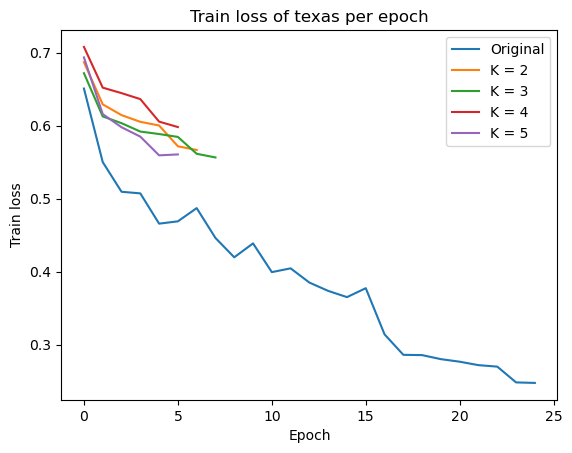

In [56]:
for i in range(len(nhs_util.histories)):
    if i == 0:
        plt.plot(nhs_util.histories[i].history['loss'], label="Original")
    else:
        plt.plot(nhs_util.histories[i].history['loss'], label=f"K = {nhs_util.k_list[i-1]}")
plt.xlabel("Epoch")
plt.ylabel(f"Train loss")
plt.title(f"Train loss of {data} per epoch")
plt.legend()
plt.show()

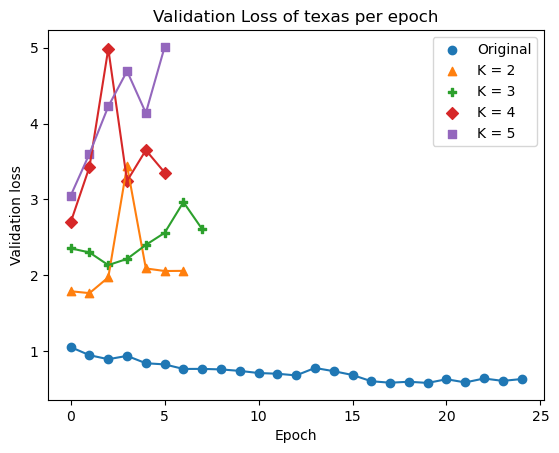

In [62]:
markers = ["o", "^", "P", "D", "s"]
for i in range(len(nhs_util.histories)):
    if i == 0:
        plt.plot(nhs_util.histories[i].history['val_loss'])
        plt.scatter(range(len(nhs_util.histories[i].history['val_loss'])),
                    nhs_util.histories[i].history['val_loss'],
                    marker=markers[i], label="Original")
    else:
        plt.plot(nhs_util.histories[i].history['val_loss'])
        plt.scatter(range(len(nhs_util.histories[i].history['val_loss'])),
                    nhs_util.histories[i].history['val_loss'],
                    marker=markers[i], label=f"K = {nhs_util.k_list[i-1]}")
plt.xlabel("Epoch")
plt.ylabel("Validation loss")
plt.title(f"Validation Loss of {data} per epoch")
plt.legend()
plt.show()

In [58]:
test_accs = {}
_, X_test, y_test = encodeNonAnonData(data, f"/Users/amirrezasokhankhosh/Documents/Workstation/testing_adult/data/{data}/test.csv")
for i in range(len(nhs_util.k_list) + 1):
    if i == 0:
        nhs_util.models[i] = tf.keras.models.load_model(f"./weights/model_{data}_org.h5")
    else:
        nhs_util.models[i] = tf.keras.models.load_model(f"./weights/model_{data}_{k_list[i-1]}.h5")
    X, y = nhs_util.features[i]
    res = nhs_util.models[i].evaluate(X_test, y_test, verbose=0)
    if i == 0:
        test_accs["Original"] = res
    else:
        test_accs[f"K = {k_list[i-1]}"] = res

Replacing all generalized values...


14815it [00:00, 23621.68it/s]
2023-12-15 20:52:14.865831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-15 20:52:17.002298: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-15 20:52:19.069449: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-15 20:52:21.177284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-12-15 20:52:23.244699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


Text(0, 0.5, 'MSE Loss')

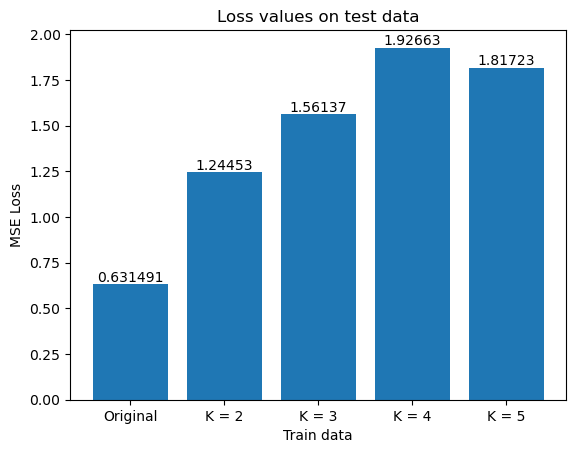

In [60]:
names = ["Original"] + [f"K = {k}" for k in k_list]
height = [test_accs[name] for name in names]
bar = plt.bar(names, height)
plt.bar_label(bar)
plt.title("Loss values on test data")
plt.xlabel("Train data")
plt.ylabel("MSE Loss")